# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.dates as mdates
warnings.filterwarnings("ignore")
from datetime import datetime
from datetime import timedelta
from datetime import date
import random
import time

# Import the dataset

change the directory

In [2]:
cd/Users/Zed Kamurase/Downloads

C:\Users\Zed Kamurase\Downloads


In [3]:
#with open('/Users/Zed Kamurase/Downloads/spambase.data') as f:
    #lines = f.readlines()

In [4]:
#Import the dataset
spam_det= pd.read_csv('/Users/Zed Kamurase/Downloads/spambase.data',header=None, sep=",")

In [5]:
#Dataset review
spam_det.head(5)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
#Renaming the attributes with for loop.
attribute_name = [] #open an empty dataframe to store the attributes.
a = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
     'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will',
     'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business',
     'word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money',
     'word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet',
     'word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
     'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
     'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_','char_freq_','char_freq_',
     'char_freq_','char_freq_','char_freq_','capital_run_length_average','capital_run_length_longest',
     'capital_run_length_total','spam']

for i in range(0,58):#Iterate in all attributes 
    b =a[i] 
    attribute_name.append(b) #append all columns to a particular name of each attributes.

In [7]:
#assign the names of attribute to the columns of the dataset
spam_det.columns= attribute_name

In [8]:
spam_det.head() #Read the datset to have an idea of the out put.

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_,char_freq_,char_freq_,char_freq_,char_freq_,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Split the varaibles of the variables of the datset into dependent and Independent varaibles

In [9]:
y = spam_det.iloc[:,-1] #predicting varaible which is spam column
#y = cancer.iloc[:,1:2]

In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [11]:
x = spam_det.iloc[:,0:57] #predictors which are the remaining columns

In [12]:
x.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_,char_freq_,char_freq_,char_freq_,char_freq_,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


# Decision tree

 Why did they do this code?

In [13]:
#from sklearn.preprocessing import label_binarize
#y = label_binarize(y, classes=['0', '1'])

In [14]:
#Import the libraries.
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
np.random.seed(50)

Ask about this code?

In [15]:
inner_cv = KFold(n_splits=5, shuffle=True,random_state = 50) # for parameter optimization (validation)
outer_cv = KFold(n_splits=5, shuffle=True,random_state = 50) # generalization performance testing

Set the model

In [16]:
dt0 = DecisionTreeClassifier(random_state=50) #call the model decision Tree classifier
dt0.fit(x,y) #fit the variables 
nested_score_gs = cross_val_score(dt0, X=x, y=y, cv=inner_cv,scoring='f1') #set the results 
print("Nested CV Accuracy: ",nested_score_gs.mean(), " +/- ", nested_score_gs.std()) #print out the results

Nested CV Accuracy:  0.8949761971789192  +/-  0.005867188761234071


In [34]:
### first tuning

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=50),
                  param_grid=[{'max_depth': list(np.arange(1,20,3)),
                               'max_leaf_nodes': list(np.arange(10,30,3)),
                               'min_impurity_decrease': list(np.arange(0,0.011,0.002)),
                               'min_samples_leaf': list(np.arange(1,20,4)),
                               'criterion':['gini','entropy']}],
                  scoring='f1', 
                  cv=inner_cv,
                  n_jobs=4)

gs_dt = gs_dt.fit(x,y)

print("Non-nested CV Accuracy: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)

Non-nested CV Accuracy:  0.8909021796170732
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 28, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=28,
                       min_samples_leaf=5, random_state=50)


In [ ]:
#nested_score_gs = cross_val_score(gs_dt, X=x, y=y, cv=outer_cv, scoring='f1')
#print("Nested CV Accuracy: ",nested_score_gs.mean(), " +/- ", nested_score_gs.std())

# KNN

In [17]:
#Normalize Data
pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', neighbors.KNeighborsClassifier(metric='minkowski')) ])

params = {'knn__n_neighbors': list(np.arange(1,20,1)),
          'knn__weights': ['uniform', 'distance'],
          'knn__p': [1,2]}

gs_knn = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn = gs_knn.fit(x,y.ravel()) 
print("Non-nested CV Accuracy: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)

Non-nested CV Accuracy:  0.9033128478454608
Optimal Parameter:  {'knn__n_neighbors': 8, 'knn__p': 1, 'knn__weights': 'distance'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=8, p=1, weights='distance'))])


# Logistics Regression.

In [22]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=50, solver='liblinear'),
                  param_grid=[{'C': [0.01, 0.1 ,1 ,10 ,100, 1000, 10000],
                               'penalty':['l1','l2'],
                               'fit_intercept':['True','False']}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=4)

gs_lr = gs_lr.fit(x,y.ravel())

print("Non-nested CV Accuracy: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=x, y=y.ravel(), cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())

Non-nested CV Accuracy:  0.906300524337157
Optimal Parameter:  {'C': 1, 'fit_intercept': 'True', 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=1, fit_intercept='True', random_state=50,
                   solver='liblinear')
Nested CV Accuracy: 0.904266447143986  +/-  0.01302145484802978


# Learning curve

In [24]:
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:            #if ylim was specified as an input, make sure the plots use these limits
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") 
    return plt             

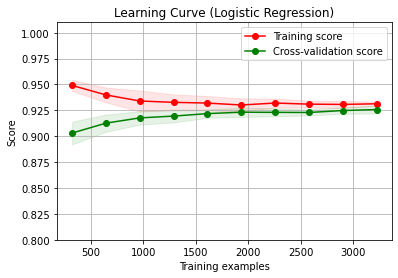

In [26]:
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

title = "Learning Curve (Logistic Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = gs_lr.best_estimator_
plot_learning_curve(estimator, title, x, y, (0.8, 1.01), cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))

plt.show()

# Fitting Graph

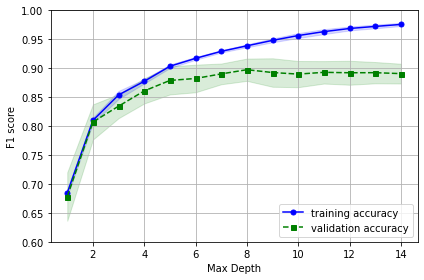

In [31]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

param_range = list(np.arange(1,15,1))

train_scores, test_scores = validation_curve( 
                estimator=DecisionTreeClassifier(random_state=50), 
                X=X_train, 
                y=y_train, 
                param_name="max_depth", 
                param_range=param_range,
                cv=10,    
                scoring="f1", 
                n_jobs=4)

# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Max Depth')
plt.ylabel('F1 score')
plt.ylim([0.60, 1.0]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure

# ROC Curve

10-fold cross validation:

ROC AUC: 0.96 (+/- 0.03) [Logistic regression]
ROC AUC: 0.96 (+/- 0.03) [Decision tree]
ROC AUC: 0.96 (+/- 0.02) [kNN]


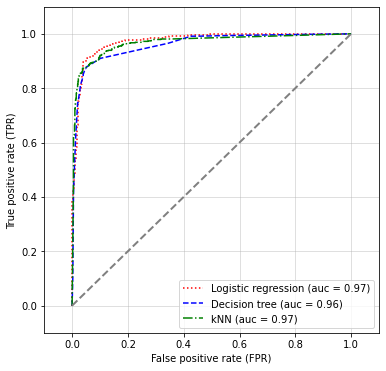

In [35]:
### ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

clf1 =  gs_lr.best_estimator_
clf2 =  gs_dt.best_estimator_
clf3 =  Pipeline([
        ('sc', StandardScaler()),     
        ('knn', gs_knn.best_estimator_)])

clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    if clf==clf1:
        y=y.ravel()
    scores = cross_val_score(estimator=clf, 
                             X=x,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

colors = [ 'red', 'blue', 'green'] 
linestyles = [':', '--', '-.', '-'] 

plt.figure(figsize=(6,6))  
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):
    if clf==clf1:
        y_train=y_train.ravel()
        
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()